## 梯度
导数+下降最快的方向 = 梯度

### 1.向前计算
对于PyTorch中的一个tensor没如果设置它的属性`requires_grad`为`True`，那么会追踪该张量的所有操作。或者可以理解为，这个tensor是一个参数，后续会被计算梯度，更新该参数。tensor所有的操作都会被记录在`grad_fn`中

计算过程
假设x为参数，需要对其进行梯度的计算和更新

In [63]:
import torch
x = torch.ones(2,2,requires_grad = True) #初始化x并设置记录梯度
print(x)

y = x+2
z = y*y*3
print(z)

out = z.mean() # 求均值
print(out)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


In [64]:
print(z.grad_fn)

### 2.反向传播

对于上述中的out而言，我们可以使用backward方法进行反向传播，计算梯度，
可求出dout/dx,再调用x.grad能够获取其梯度值。

In [65]:
out.backward()

In [66]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

<red>注</red>:<br> 
1.每次调用out.backward()都会计算梯度并累加到x.grad中。<br>
    所以在for循环中计算梯度时，需要先将梯度清空。<br>
2.使用了`required_grad = True`后要使用tensor，不能直接用，要使用`x.data`，如果要转换为numpy类型,`tensor.detach().numpy`

## 线性回归Demo

In [67]:
learning_rate = 0.01

# 1.准备数据
# y = 3x+0.8
x = torch.rand([500,1])* 10
y_true = x*3+8

w = torch.rand([1,1],requires_grad = True)
b = torch.tensor(0,requires_grad = True,dtype = torch.float)
print(b)
# 4. 通过循环，反向传播，更新参数
for i in range(1000):
    # 2.通过模型计算y_predict
    y_predict = torch.matmul(x,w) + b

    # 3.计算Loss
    loss = torch.mean((y_true - y_predict).pow(2))
    if w.grad is not None:
        w.data.zero_()
    if b is not None:
        b.data.zero_()
        
    loss.backward()# 反向传播
    w.data = w.data - learning_rate*w.grad
    b.data = b.data - learning_rate*b.grad
    print("w,b,loss-----",w.item(),b.item(),loss.item())
    
    


tensor(0., requires_grad=True)
w,b,loss----- 3.068988084793091 0.37795257568359375 394.1541748046875
w,b,loss----- 2.9590237140655518 0.5234650373458862 52.972129821777344
w,b,loss----- 3.736999988555908 0.6771109700202942 59.03089904785156
w,b,loss----- 3.9848577976226807 0.7495518326759338 17.390277862548828
w,b,loss----- 4.061463832855225 0.7956515550613403 12.939872741699219
w,b,loss----- 4.082759380340576 0.833135724067688 12.37221622467041
w,b,loss----- 4.086202144622803 0.867731511592865 12.210784912109375
w,b,loss----- 4.083892822265625 0.9012896418571472 12.09269905090332
w,b,loss----- 4.07974100112915 0.9344085454940796 11.980072975158691
w,b,loss----- 4.075009822845459 0.9672819972038269 11.868949890136719
w,b,loss----- 4.070107460021973 0.9999731779098511 11.758902549743652
w,b,loss----- 4.065164566040039 1.0325028896331787 11.649881362915039
w,b,loss----- 4.060225486755371 1.0648783445358276 11.5418701171875
w,b,loss----- 4.055302143096924 1.097102403640747 11.434862136840

w,b,loss----- 3.411914825439453 5.305602073669434 1.742173671722412
w,b,loss----- 3.410001039505005 5.318121910095215 1.726022481918335
w,b,loss----- 3.4080963134765625 5.330582618713379 1.7100193500518799
w,b,loss----- 3.4061999320983887 5.3429856300354 1.694165825843811
w,b,loss----- 3.4043126106262207 5.3553314208984375 1.6784594058990479
w,b,loss----- 3.4024341106414795 5.367619514465332 1.6628973484039307
w,b,loss----- 3.400564193725586 5.3798508644104 1.6474803686141968
w,b,loss----- 3.39870285987854 5.392024993896484 1.6322065591812134
w,b,loss----- 3.3968505859375 5.4041428565979 1.6170735359191895
w,b,loss----- 3.3950064182281494 5.41620397567749 1.6020816564559937
w,b,loss----- 3.3931710720062256 5.4282097816467285 1.5872279405593872
w,b,loss----- 3.3913443088531494 5.440159320831299 1.5725125074386597
w,b,loss----- 3.389525890350342 5.452053070068359 1.5579332113265991
w,b,loss----- 3.387716054916382 5.463891983032227 1.5434894561767578
w,b,loss----- 3.3859145641326904 5.475

w,b,loss----- 3.130383014678955 7.147146224975586 0.17454886436462402
w,b,loss----- 3.129777193069458 7.15110969543457 0.17293070256710052
w,b,loss----- 3.12917423248291 7.155053615570068 0.171327143907547
w,b,loss----- 3.1285738945007324 7.158979415893555 0.1697387993335724
w,b,loss----- 3.127976417541504 7.162886619567871 0.1681652069091797
w,b,loss----- 3.1273818016052246 7.166776657104492 0.16660629212856293
w,b,loss----- 3.1267900466918945 7.170648097991943 0.16506148874759674
w,b,loss----- 3.1262009143829346 7.174501895904541 0.16353115439414978
w,b,loss----- 3.1256141662597656 7.178337097167969 0.16201502084732056
w,b,loss----- 3.125030755996704 7.182155132293701 0.1605130136013031
w,b,loss----- 3.1244497299194336 7.185955047607422 0.15902471542358398
w,b,loss----- 3.123871326446533 7.189737319946289 0.15755043923854828
w,b,loss----- 3.123296022415161 7.193501949310303 0.15608979761600494
w,b,loss----- 3.122723340988159 7.197249412536621 0.15464268624782562
w,b,loss----- 3.12215

w,b,loss----- 3.036393404006958 7.7619452476501465 0.01359947957098484
w,b,loss----- 3.036224365234375 7.7630510330200195 0.013473354279994965
w,b,loss----- 3.0360560417175293 7.7641520500183105 0.013348491862416267
w,b,loss----- 3.035888671875 7.765247821807861 0.013224725611507893
w,b,loss----- 3.035721778869629 7.766338348388672 0.013102148659527302
w,b,loss----- 3.035555601119995 7.7674241065979 0.012980674393475056
w,b,loss----- 3.035390615463257 7.768505096435547 0.01286035031080246
w,b,loss----- 3.0352261066436768 7.769580364227295 0.012741061858832836
w,b,loss----- 3.035062551498413 7.770650863647461 0.012622968293726444
w,b,loss----- 3.0348994731903076 7.771716594696045 0.012505963444709778
w,b,loss----- 3.0347375869750977 7.772777557373047 0.012389987707138062
w,b,loss----- 3.034575939178467 7.773833274841309 0.012275109998881817
w,b,loss----- 3.0344154834747314 7.7748847007751465 0.012161302380263805
w,b,loss----- 3.0342555046081543 7.775930404663086 0.01204848662018776
w,b,

w,b,loss----- 3.011627197265625 7.923943519592285 0.0013881742488592863
w,b,loss----- 3.011573076248169 7.924296855926514 0.0013752910308539867
w,b,loss----- 3.011519432067871 7.924648284912109 0.0013625361025333405
w,b,loss----- 3.0114660263061523 7.924998760223389 0.0013499222695827484
w,b,loss----- 3.0114128589630127 7.925347328186035 0.0013373886467888951
w,b,loss----- 3.011359691619873 7.925693988800049 0.0013249902985990047
w,b,loss----- 3.0113070011138916 7.926039218902588 0.0013127189595252275
w,b,loss----- 3.0112545490264893 7.926383018493652 0.0013005476212128997
w,b,loss----- 3.011202096939087 7.926724910736084 0.0012884854804724455
w,b,loss----- 3.0111501216888428 7.927065372467041 0.0012765348656103015
w,b,loss----- 3.0110981464385986 7.927403926849365 0.001264712424017489
w,b,loss----- 3.011046886444092 7.927741527557373 0.0012529895175248384
w,b,loss----- 3.010995626449585 7.928077220916748 0.001241360791027546
w,b,loss----- 3.010944366455078 7.92841100692749 0.001229855

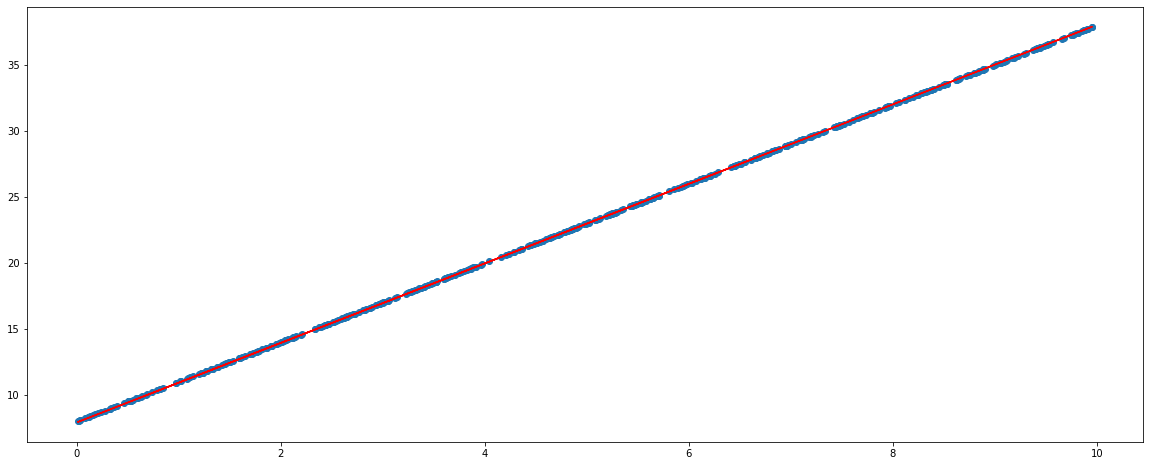

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.scatter(x.numpy().reshape(-1),y_true.numpy().reshape(-1))
y_predict = torch.matmul(x,w)+b
plt.plot(x.numpy().reshape(-1),y_predict.detach().numpy().reshape(-1),c="red")
plt.show()

## 使用PyTorch的API完成线性回归模型

### 1. nn.Module
`nn.module`是`torch.nn`提供的一个自定义网络的一个基类，在使用自定义网络时，需要注意:<br>
1.`__init__`需要调用super方法，继承父类的属性和方法<br>
2.`forward`方法必须实现，用来自定义网络的向前计算过程
使用前面的 y=wx+b的模型举例如下：

In [69]:
from torch import nn
class Lr(nn.Module):
    def __init__(self):
        super(Lr,self).__init__()
        self.linear = nn.Linear(1,1)
        
    def forward(self,x):
        out = self.linear(x)
        return out

注：<br>
1.`nn.Linear`为torch预定义号的线性模型/全连接层。参数(输入数量，输出数量)<br>
2.`nn.Module`定义了__call__方法，实现的就是调用forward方法，即Lr的实例，能够直接被传入参数调用。

In [70]:
# 实例化模型
model = Lr()
# predict = model(x)

## 2.损失函数
1.均方误差:`nn.MSELoss()`，常用于多分类问题<br>
2.交叉熵损失：`nn.CrossEntropyLoss()`，常用语逻辑回归

## 3.优化器类
优化器`optimizer`，可以理解为torch封装的进行更新参数的方法，比如常见的随机梯度下降`(stochastic gradient descent,SGD)`<br>
优化其是由`torch.optim`提供的，如<br>
1.`torch.optim.SGD(参数，学习率)`<br>
2.`torch.optim.Adam(参数，学习率)`<br>
<br>
注意：<br>
1.参数可以使用`model.parameters()`来获取所有`requires_grad = True`的参数<br>
2.优化器的使用方法： 实例化-> 所有参数的梯度，将其置0 -> 反向传播计算梯度 -> 更新参数值

## 线性回归完整Demo

In [3]:
import torch
import torch.nn as nn

# 1.准备数据
x = torch.rand([500,1]) #初始化x并设置记录梯度
y_true = 3*x + 8

# 2.定义模型
class MyLr(nn.Module):
    def __init__(self):
        super(MyLr,self).__init__()
        self.linear = nn.Linear(1,1)
        
    def forward(self,x):
        out = self.linear(x)
        return out
    
# 3.实例化模型，优化器类实例化，Loss实例化
mymodel = MyLr() # 实例化模型
loss_fn = nn.MSELoss() #实例化损失函数
optimizer = torch.optim.SGD(mymodel.parameters(),lr=1e-3) #实例化优化器
# 4.循环，进行梯度下降，更新参数
for i in range(5000):
    y_predict = mymodel(x)#前向计算预测值
    loss = loss_fn(y_predict,y_true) #得到损失值
    optimizer.zero_grad() #梯度置0
    loss.backward() #反向传播计算梯度
    optimizer.step() #更新参数的值
    if i % 50 == 0:
        print(loss.item(),list(mymodel.parameters()))

108.92758178710938 [Parameter containing:
tensor([[-0.2802]], requires_grad=True), Parameter containing:
tensor([-0.6655], requires_grad=True)]
84.19414520263672 [Parameter containing:
tensor([[0.2500]], requires_grad=True), Parameter containing:
tensor([0.3087], requires_grad=True)]
65.08198547363281 [Parameter containing:
tensor([[0.7153]], requires_grad=True), Parameter containing:
tensor([1.1655], requires_grad=True)]
50.31344985961914 [Parameter containing:
tensor([[1.1234]], requires_grad=True), Parameter containing:
tensor([1.9192], requires_grad=True)]
38.90129852294922 [Parameter containing:
tensor([[1.4814]], requires_grad=True), Parameter containing:
tensor([2.5821], requires_grad=True)]
30.082683563232422 [Parameter containing:
tensor([[1.7952]], requires_grad=True), Parameter containing:
tensor([3.1654], requires_grad=True)]
23.268110275268555 [Parameter containing:
tensor([[2.0702]], requires_grad=True), Parameter containing:
tensor([3.6785], requires_grad=True)]
18.00211

0.05404695123434067 [Parameter containing:
tensor([[3.8016]], requires_grad=True), Parameter containing:
tensor([7.5498], requires_grad=True)]
0.05335339158773422 [Parameter containing:
tensor([[3.7968]], requires_grad=True), Parameter containing:
tensor([7.5531], requires_grad=True)]
0.05267077311873436 [Parameter containing:
tensor([[3.7920]], requires_grad=True), Parameter containing:
tensor([7.5564], requires_grad=True)]
0.051998112350702286 [Parameter containing:
tensor([[3.7872]], requires_grad=True), Parameter containing:
tensor([7.5597], requires_grad=True)]
0.05133470147848129 [Parameter containing:
tensor([[3.7824]], requires_grad=True), Parameter containing:
tensor([7.5628], requires_grad=True)]
0.050680264830589294 [Parameter containing:
tensor([[3.7776]], requires_grad=True), Parameter containing:
tensor([7.5659], requires_grad=True)]
0.05003482103347778 [Parameter containing:
tensor([[3.7728]], requires_grad=True), Parameter containing:
tensor([7.5690], requires_grad=True

## 模型评估

In [73]:
# 当前模型默认为训练,使用eval方法设置模型为预测模式
mymodel.eval() 

MyLr(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

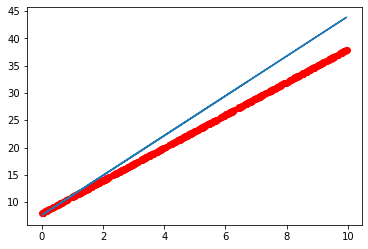

In [74]:
predict = mymodel(x)
predict = predict.data.numpy()
plt.scatter(x.data.numpy(),y_true.data.numpy(),c="r")
plt.plot(x.data.numpy(),predict)
plt.show()

## 在GPU上运行

In [6]:
# 判断GPU是否可用
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
import torch
import torch.nn as nn

# 1.准备数据
x = torch.rand([500,1]).to(device) #初始化x并设置记录梯度
y_true = 3*x + 8

# 2.定义模型
class MyLr(nn.Module):
    def __init__(self):
        super(MyLr,self).__init__()
        self.linear = nn.Linear(1,1)
        
    def forward(self,x):
        out = self.linear(x)
        return out
    
# 3.实例化模型，优化器类实例化，Loss实例化
mymodel = MyLr().to(device) # 实例化模型
loss_fn = nn.MSELoss() #实例化损失函数
optimizer = torch.optim.SGD(mymodel.parameters(),lr=1e-3) #实例化优化器

# 4.循环，进行梯度下降，更新参数
for i in range(5000):
    y_predict = mymodel(x)#前向计算预测值
    loss = loss_fn(y_predict,y_true) #得到损失值
    optimizer.zero_grad() #梯度置0
    loss.backward() #反向传播计算梯度
    optimizer.step() #更新参数的值
    if i % 50 == 0:
        print(loss.item(),list(mymodel.parameters()))

101.73274230957031 [Parameter containing:
tensor([[0.0717]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.5788], device='cuda:0', requires_grad=True)]
79.055908203125 [Parameter containing:
tensor([[0.5597]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.3645], device='cuda:0', requires_grad=True)]
61.439571380615234 [Parameter containing:
tensor([[0.9889]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([1.1965], device='cuda:0', requires_grad=True)]
47.75437545776367 [Parameter containing:
tensor([[1.3663]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([1.9302], device='cuda:0', requires_grad=True)]
37.12299346923828 [Parameter containing:
tensor([[1.6981]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([2.5773], device='cuda:0', requires_grad=True)]
28.863906860351562 [Parameter containing:
tensor([[1.9896]], device='cuda:0', requires_grad=True), Parameter containing:
ten

0.06721477210521698 [Parameter containing:
tensor([[3.8971]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.5100], device='cuda:0', requires_grad=True)]
0.06630445271730423 [Parameter containing:
tensor([[3.8922]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.5145], device='cuda:0', requires_grad=True)]
0.06541787832975388 [Parameter containing:
tensor([[3.8871]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.5189], device='cuda:0', requires_grad=True)]
0.06455200165510178 [Parameter containing:
tensor([[3.8820]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.5231], device='cuda:0', requires_grad=True)]
0.0637044906616211 [Parameter containing:
tensor([[3.8769]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.5271], device='cuda:0', requires_grad=True)]
0.062873475253582 [Parameter containing:
tensor([[3.8718]], device='cuda:0', requires_grad=True), Parameter containi

0.03438670188188553 [Parameter containing:
tensor([[3.6477]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.6579], device='cuda:0', requires_grad=True)]
0.033948689699172974 [Parameter containing:
tensor([[3.6436]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.6601], device='cuda:0', requires_grad=True)]
0.033516570925712585 [Parameter containing:
tensor([[3.6395]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.6622], device='cuda:0', requires_grad=True)]
0.033089734613895416 [Parameter containing:
tensor([[3.6354]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.6644], device='cuda:0', requires_grad=True)]
0.032668426632881165 [Parameter containing:
tensor([[3.6313]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.6665], device='cuda:0', requires_grad=True)]
0.03225257247686386 [Parameter containing:
tensor([[3.6273]], device='cuda:0', requires_grad=True), Parameter c

0.018352719023823738 [Parameter containing:
tensor([[3.4732]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.7501], device='cuda:0', requires_grad=True)]
0.018119027838110924 [Parameter containing:
tensor([[3.4702]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.7517], device='cuda:0', requires_grad=True)]
0.017888324335217476 [Parameter containing:
tensor([[3.4672]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.7533], device='cuda:0', requires_grad=True)]
0.01766059547662735 [Parameter containing:
tensor([[3.4642]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.7548], device='cuda:0', requires_grad=True)]
0.01743561401963234 [Parameter containing:
tensor([[3.4612]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.7564], device='cuda:0', requires_grad=True)]
0.01721380464732647 [Parameter containing:
tensor([[3.4583]], device='cuda:0', requires_grad=True), Parameter co

0.009547394700348377 [Parameter containing:
tensor([[3.3413]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.8197], device='cuda:0', requires_grad=True)]
0.009426030330359936 [Parameter containing:
tensor([[3.3391]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.8209], device='cuda:0', requires_grad=True)]
0.009306026622653008 [Parameter containing:
tensor([[3.3370]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.8220], device='cuda:0', requires_grad=True)]
0.009187370538711548 [Parameter containing:
tensor([[3.3348]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.8232], device='cuda:0', requires_grad=True)]
0.009070555679500103 [Parameter containing:
tensor([[3.3327]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.8243], device='cuda:0', requires_grad=True)]
0.008955095894634724 [Parameter containing:
tensor([[3.3305]], device='cuda:0', requires_grad=True), Parameter

0.0050960429944098 [Parameter containing:
tensor([[3.2493]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.8683], device='cuda:0', requires_grad=True)]
0.005031283479183912 [Parameter containing:
tensor([[3.2478]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.8691], device='cuda:0', requires_grad=True)]
0.004967247601598501 [Parameter containing:
tensor([[3.2462]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.8700], device='cuda:0', requires_grad=True)]
0.004903922323137522 [Parameter containing:
tensor([[3.2446]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.8708], device='cuda:0', requires_grad=True)]
0.00484137237071991 [Parameter containing:
tensor([[3.2430]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.8716], device='cuda:0', requires_grad=True)]
0.0047798966988921165 [Parameter containing:
tensor([[3.2415]], device='cuda:0', requires_grad=True), Parameter c

0.0026514274068176746 [Parameter containing:
tensor([[3.1799]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9050], device='cuda:0', requires_grad=True)]
0.0026177845429629087 [Parameter containing:
tensor([[3.1787]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9056], device='cuda:0', requires_grad=True)]
0.00258451234549284 [Parameter containing:
tensor([[3.1776]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9062], device='cuda:0', requires_grad=True)]
0.0025516825262457132 [Parameter containing:
tensor([[3.1764]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9068], device='cuda:0', requires_grad=True)]
0.0025192033499479294 [Parameter containing:
tensor([[3.1753]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9074], device='cuda:0', requires_grad=True)]
0.0024870573543012142 [Parameter containing:
tensor([[3.1742]], device='cuda:0', requires_grad=True), Param

0.0014340023044496775 [Parameter containing:
tensor([[3.1323]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9301], device='cuda:0', requires_grad=True)]
0.0014156587421894073 [Parameter containing:
tensor([[3.1314]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9306], device='cuda:0', requires_grad=True)]
0.0013975792098790407 [Parameter containing:
tensor([[3.1306]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9310], device='cuda:0', requires_grad=True)]
0.001379849505610764 [Parameter containing:
tensor([[3.1297]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9315], device='cuda:0', requires_grad=True)]
0.0013623686973005533 [Parameter containing:
tensor([[3.1289]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9319], device='cuda:0', requires_grad=True)]
0.0013450868427753448 [Parameter containing:
tensor([[3.1281]], device='cuda:0', requires_grad=True), Para

0.0007659061811864376 [Parameter containing:
tensor([[3.0967]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9489], device='cuda:0', requires_grad=True)]
0.0007560740923509002 [Parameter containing:
tensor([[3.0960]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9493], device='cuda:0', requires_grad=True)]
0.0007464077789336443 [Parameter containing:
tensor([[3.0954]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9496], device='cuda:0', requires_grad=True)]
0.0007369604427367449 [Parameter containing:
tensor([[3.0948]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9499], device='cuda:0', requires_grad=True)]
0.0007276126416400075 [Parameter containing:
tensor([[3.0942]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9502], device='cuda:0', requires_grad=True)]
0.000718433759175241 [Parameter containing:
tensor([[3.0936]], device='cuda:0', requires_grad=True), Para

0.0004199707182124257 [Parameter containing:
tensor([[3.0716]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9622], device='cuda:0', requires_grad=True)]
0.00041467673145234585 [Parameter containing:
tensor([[3.0711]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9624], device='cuda:0', requires_grad=True)]
0.00040941601037047803 [Parameter containing:
tensor([[3.0707]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9626], device='cuda:0', requires_grad=True)]
0.0004041889333166182 [Parameter containing:
tensor([[3.0702]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9629], device='cuda:0', requires_grad=True)]
0.00039906890015117824 [Parameter containing:
tensor([[3.0698]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9631], device='cuda:0', requires_grad=True)]
0.00039401359390467405 [Parameter containing:
tensor([[3.0693]], device='cuda:0', requires_grad=True),

0.00022743691806681454 [Parameter containing:
tensor([[3.0527]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9722], device='cuda:0', requires_grad=True)]
0.00022459756291937083 [Parameter containing:
tensor([[3.0523]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9723], device='cuda:0', requires_grad=True)]
0.00022177619393914938 [Parameter containing:
tensor([[3.0520]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9725], device='cuda:0', requires_grad=True)]
0.00021897334954701364 [Parameter containing:
tensor([[3.0517]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9727], device='cuda:0', requires_grad=True)]
0.00021621279302053154 [Parameter containing:
tensor([[3.0513]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9728], device='cuda:0', requires_grad=True)]
0.00021352259500417858 [Parameter containing:
tensor([[3.0510]], device='cuda:0', requires_grad=True

0.0001234218943864107 [Parameter containing:
tensor([[3.0388]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9795], device='cuda:0', requires_grad=True)]
0.00012185741070425138 [Parameter containing:
tensor([[3.0386]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9796], device='cuda:0', requires_grad=True)]
0.0001203024949063547 [Parameter containing:
tensor([[3.0383]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9798], device='cuda:0', requires_grad=True)]
0.00011881448881467804 [Parameter containing:
tensor([[3.0381]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9799], device='cuda:0', requires_grad=True)]
0.00011734934378182516 [Parameter containing:
tensor([[3.0378]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9800], device='cuda:0', requires_grad=True)]
0.00011589212954277173 [Parameter containing:
tensor([[3.0376]], device='cuda:0', requires_grad=True),

6.726230640197173e-05 [Parameter containing:
tensor([[3.0286]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9848], device='cuda:0', requires_grad=True)]
6.642328662564978e-05 [Parameter containing:
tensor([[3.0284]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9849], device='cuda:0', requires_grad=True)]
6.558931636391208e-05 [Parameter containing:
tensor([[3.0283]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9850], device='cuda:0', requires_grad=True)]
6.476143607869744e-05 [Parameter containing:
tensor([[3.0281]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9851], device='cuda:0', requires_grad=True)]
6.393828516593203e-05 [Parameter containing:
tensor([[3.0279]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9852], device='cuda:0', requires_grad=True)]
6.312051846180111e-05 [Parameter containing:
tensor([[3.0277]], device='cuda:0', requires_grad=True), Par

3.671828017104417e-05 [Parameter containing:
tensor([[3.0211]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9888], device='cuda:0', requires_grad=True)]
3.626133548095822e-05 [Parameter containing:
tensor([[3.0210]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9888], device='cuda:0', requires_grad=True)]
3.580685006454587e-05 [Parameter containing:
tensor([[3.0209]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9889], device='cuda:0', requires_grad=True)]
3.535606083460152e-05 [Parameter containing:
tensor([[3.0207]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9890], device='cuda:0', requires_grad=True)]
3.4907447115983814e-05 [Parameter containing:
tensor([[3.0206]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9891], device='cuda:0', requires_grad=True)]
3.446182745392434e-05 [Parameter containing:
tensor([[3.0205]], device='cuda:0', requires_grad=True), Pa

2.0282492187106982e-05 [Parameter containing:
tensor([[3.0157]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9916], device='cuda:0', requires_grad=True)]
2.004034467972815e-05 [Parameter containing:
tensor([[3.0156]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9917], device='cuda:0', requires_grad=True)]
1.980007073143497e-05 [Parameter containing:
tensor([[3.0155]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9917], device='cuda:0', requires_grad=True)]
1.9560709915822372e-05 [Parameter containing:
tensor([[3.0154]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9918], device='cuda:0', requires_grad=True)]
1.932341001520399e-05 [Parameter containing:
tensor([[3.0153]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9918], device='cuda:0', requires_grad=True)]
1.9087368855252862e-05 [Parameter containing:
tensor([[3.0152]], device='cuda:0', requires_grad=True), 

1.1289884241705295e-05 [Parameter containing:
tensor([[3.0118]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9938], device='cuda:0', requires_grad=True)]
1.1154244020872284e-05 [Parameter containing:
tensor([[3.0117]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9939], device='cuda:0', requires_grad=True)]
1.1019544217560906e-05 [Parameter containing:
tensor([[3.0116]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9939], device='cuda:0', requires_grad=True)]
1.0885688425332773e-05 [Parameter containing:
tensor([[3.0115]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9939], device='cuda:0', requires_grad=True)]
1.0752867638075259e-05 [Parameter containing:
tensor([[3.0115]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9940], device='cuda:0', requires_grad=True)]
1.0620834473229479e-05 [Parameter containing:
tensor([[3.0114]], device='cuda:0', requires_grad=True

6.289738394116284e-06 [Parameter containing:
tensor([[3.0087]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9953], device='cuda:0', requires_grad=True)]
6.222414413059596e-06 [Parameter containing:
tensor([[3.0087]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9954], device='cuda:0', requires_grad=True)]
6.1555438151117414e-06 [Parameter containing:
tensor([[3.0086]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9954], device='cuda:0', requires_grad=True)]
6.088875579735031e-06 [Parameter containing:
tensor([[3.0086]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9954], device='cuda:0', requires_grad=True)]
6.022775778546929e-06 [Parameter containing:
tensor([[3.0085]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9954], device='cuda:0', requires_grad=True)]
5.956865607004147e-06 [Parameter containing:
tensor([[3.0085]], device='cuda:0', requires_grad=True), Pa

3.714905915330746e-06 [Parameter containing:
tensor([[3.0067]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9964], device='cuda:0', requires_grad=True)]
3.6726592043123674e-06 [Parameter containing:
tensor([[3.0067]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9964], device='cuda:0', requires_grad=True)]
3.6307399113866268e-06 [Parameter containing:
tensor([[3.0066]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9965], device='cuda:0', requires_grad=True)]
3.589053903851891e-06 [Parameter containing:
tensor([[3.0066]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9965], device='cuda:0', requires_grad=True)]
3.547570941009326e-06 [Parameter containing:
tensor([[3.0066]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9965], device='cuda:0', requires_grad=True)]
3.50650566360855e-06 [Parameter containing:
tensor([[3.0065]], device='cuda:0', requires_grad=True), Pa

2.029019697147305e-06 [Parameter containing:
tensor([[3.0050]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9974], device='cuda:0', requires_grad=True)]
2.000268068513833e-06 [Parameter containing:
tensor([[3.0050]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9974], device='cuda:0', requires_grad=True)]
1.9717701889021555e-06 [Parameter containing:
tensor([[3.0049]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9974], device='cuda:0', requires_grad=True)]
1.943445795404841e-06 [Parameter containing:
tensor([[3.0049]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9975], device='cuda:0', requires_grad=True)]
1.915287157316925e-06 [Parameter containing:
tensor([[3.0048]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9975], device='cuda:0', requires_grad=True)]
1.8873698763854918e-06 [Parameter containing:
tensor([[3.0048]], device='cuda:0', requires_grad=True), P

1.1231936696276534e-06 [Parameter containing:
tensor([[3.0037]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9980], device='cuda:0', requires_grad=True)]
1.108945411942841e-06 [Parameter containing:
tensor([[3.0037]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9981], device='cuda:0', requires_grad=True)]
1.0947567261609947e-06 [Parameter containing:
tensor([[3.0037]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9981], device='cuda:0', requires_grad=True)]
1.080792458196811e-06 [Parameter containing:
tensor([[3.0036]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9981], device='cuda:0', requires_grad=True)]
1.0668276217984385e-06 [Parameter containing:
tensor([[3.0036]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9981], device='cuda:0', requires_grad=True)]
1.052951461133489e-06 [Parameter containing:
tensor([[3.0036]], device='cuda:0', requires_grad=True), 

6.362077442645386e-07 [Parameter containing:
tensor([[3.0028]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9985], device='cuda:0', requires_grad=True)]
6.308767979135155e-07 [Parameter containing:
tensor([[3.0028]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9985], device='cuda:0', requires_grad=True)]
6.256610163291043e-07 [Parameter containing:
tensor([[3.0028]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9985], device='cuda:0', requires_grad=True)]
6.202764666340954e-07 [Parameter containing:
tensor([[3.0027]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9985], device='cuda:0', requires_grad=True)]
6.150613671707106e-07 [Parameter containing:
tensor([[3.0027]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([7.9985], device='cuda:0', requires_grad=True)]
6.098399012444133e-07 [Parameter containing:
tensor([[3.0027]], device='cuda:0', requires_grad=True), Par